# Exploring the Invariance of SIFT Features

In [30]:
# Library Imports
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### 1.1: Invariance under changes in scale

In [31]:
img1 = cv2.imread('book.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

scale = [0.2, 0.5, 0.8, 1.25, 2, 5]

In [32]:
sift = cv2.xfeatures2d.SIFT_create()
height, width = img1.shape[0:2] # image size
kp,dp = sift.detectAndCompute(img1,None)

resimg = []
M =[]
keypoints = []
descriptors = []
matches = []
matched_imgs = []

for i in range(len(scale)):
    resimg.append(cv2.resize(img1,None, fx=scale[i],fy=scale[i], interpolation = cv2.INTER_AREA))
#    M.append(cv2.getRotationMatrix2D((width/2,height/2),0,scale[i]))
#    resimg.append(cv2.warpAffine(img1,M[i],(width,height)))
keypoints,descriptors = map(list,zip(*[sift.detectAndCompute(resimg[i],None) for i in range(len(scale))]))   

In [33]:
bf = cv2.BFMatcher()
matches = [bf.match(dp,descriptors[i]) for i in range(len(scale))]
for i in range(len(scale)):
    matches[i] = sorted(matches[i], key = lambda x:x.distance)
    matched_imgs.append(cv2.drawMatches(img1,kp,resimg[i],keypoints[i], matches[i][:10], None, flags=2))

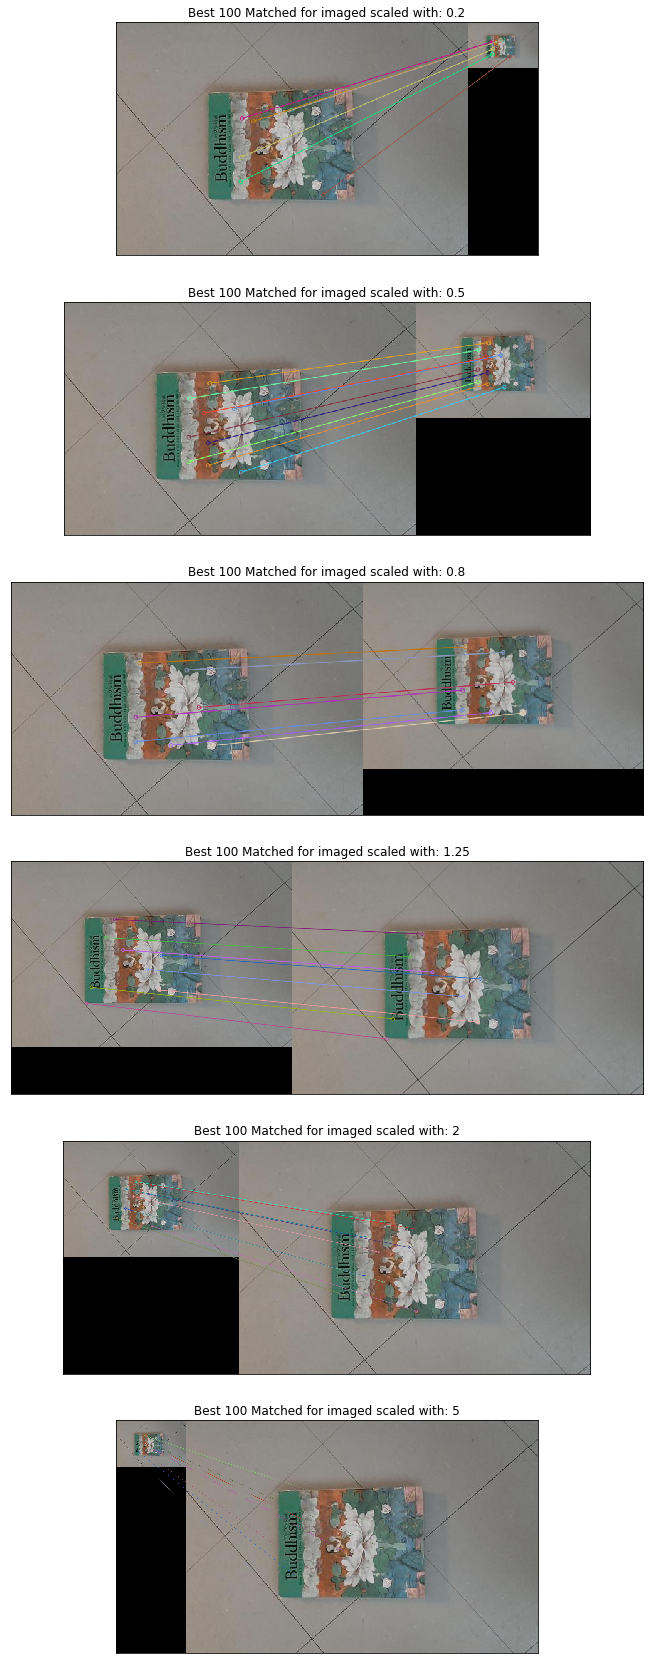

In [34]:
plt.figure(figsize=(30,30))
for i in range(len(scale)):
    plt.subplot(6,1,i+1),plt.imshow(matched_imgs[i]),plt.xticks([]),plt.yticks([])
    plt.title('Best 100 Matched for imaged scaled with: {}'.format(scale[i]))
plt.show()

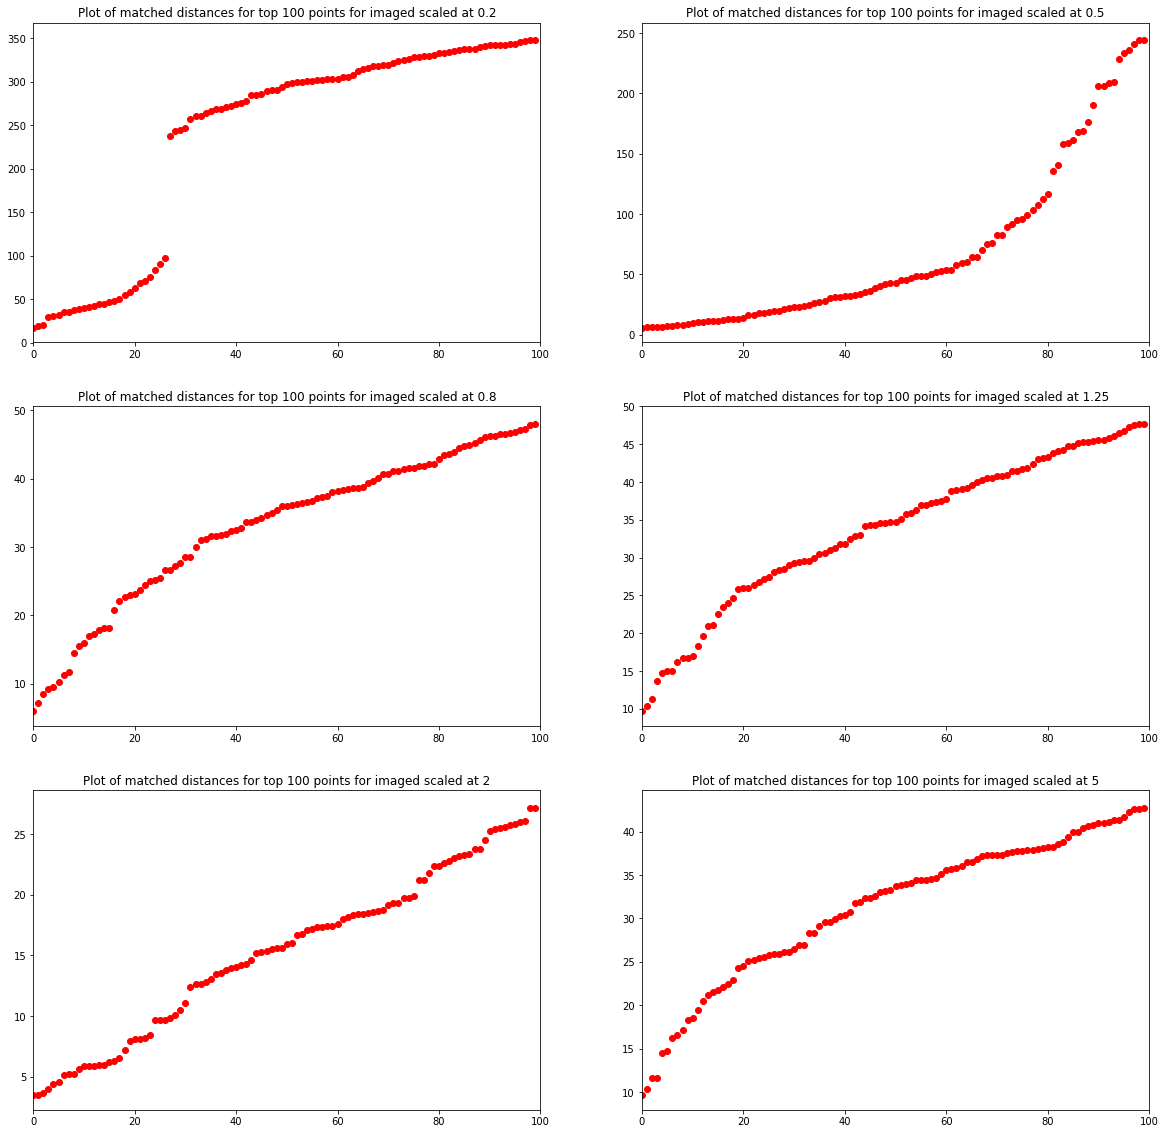

In [35]:
plt.figure(figsize=(20,20))
for j in range(len(scale)):
    for i in range(100):
        plt.subplot(3,2,j+1), plt.scatter(i, matches[j][i].distance, c='r')
        plt.title('Plot of matched distances for top 100 points for imaged scaled at {}'.format(scale[j]))
        plt.xlim([0,100])
plt.show()

By looking at the plots above one can see that as the scale increases, the matching distance decreases in all cases except for the image scale x5. The image scaled by a factor of 5 still has shorter distances between the matches than all the images that are being downscaled. One can say that increasing the scaling factor reduces the distances between the matches

#### 1.2: Invariance under changes in rotation

In [36]:
rotation = [10, 30, 90, 150, 170, 180]
# SIFT Keypoints for reference image are the same as in the previous part of the question

rotimg = []
M2 = []
keypoints2 = []
descriptors2 = []
matches2 = []
matched_imgs2 = []

for i in range(len(rotation)):
    M2.append(cv2.getRotationMatrix2D((width/2,height/2),rotation[i],1))
    rotimg.append(cv2.warpAffine(img1,M2[i],(width,height)))
keypoints2,descriptors2 = map(list,zip(*[sift.detectAndCompute(rotimg[i],None) for i in range(len(rotation))])) 
matches2 = [bf.match(dp,descriptors2[i]) for i in range(len(rotation))]

for i in range(len(scale)):
    matches2[i] = sorted(matches2[i], key = lambda x:x.distance)
    matched_imgs2.append(cv2.drawMatches(img1,kp,rotimg[i],keypoints2[i], matches2[i][:10], None, flags=2))

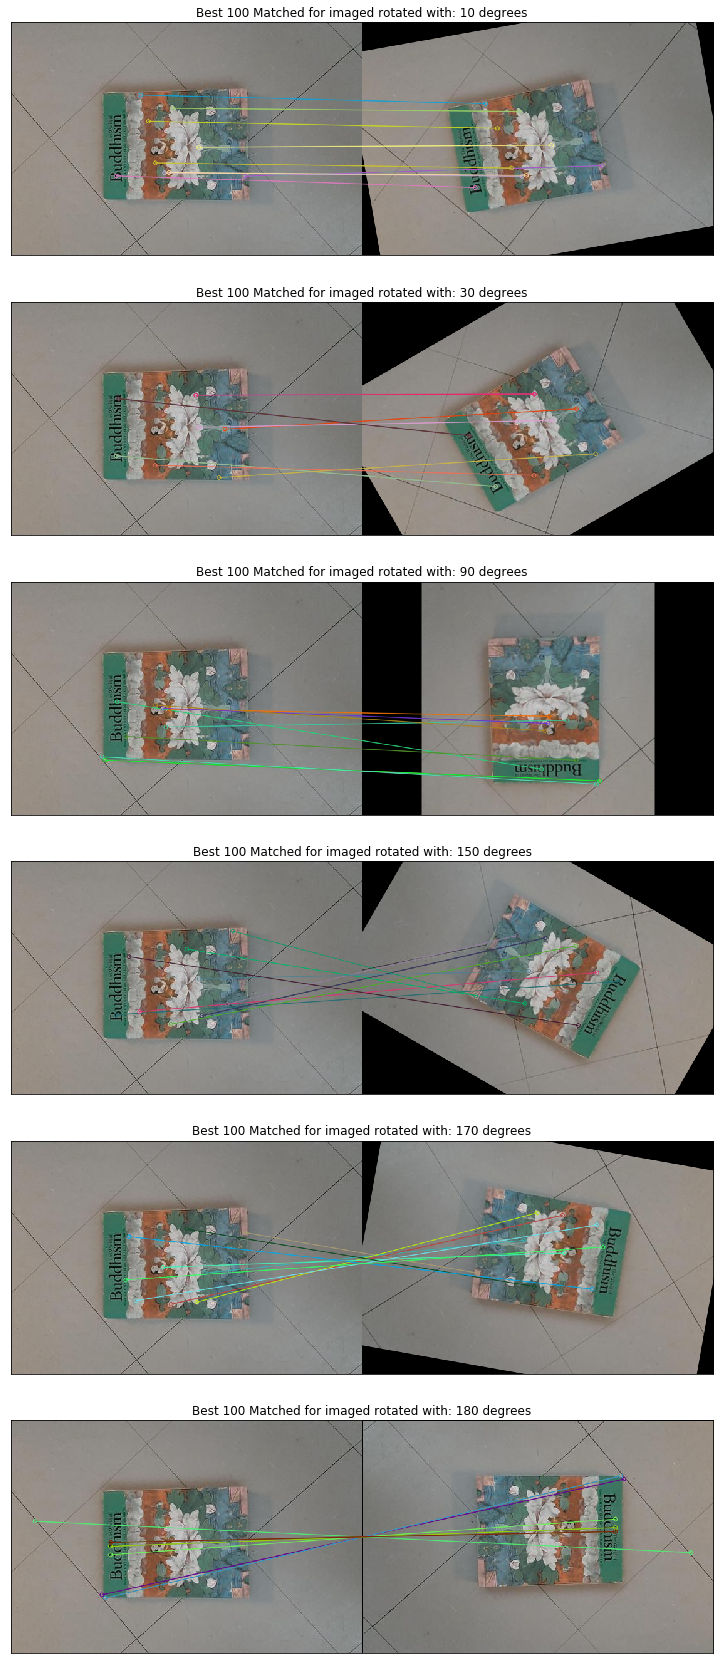

In [37]:
plt.figure(figsize=(30,30))
for i in range(len(scale)):
    plt.subplot(6,1,i+1),plt.imshow(matched_imgs2[i]),plt.xticks([]),plt.yticks([])
    plt.title('Best 100 Matched for imaged rotated with: {} degrees'.format(rotation[i]))
plt.show()

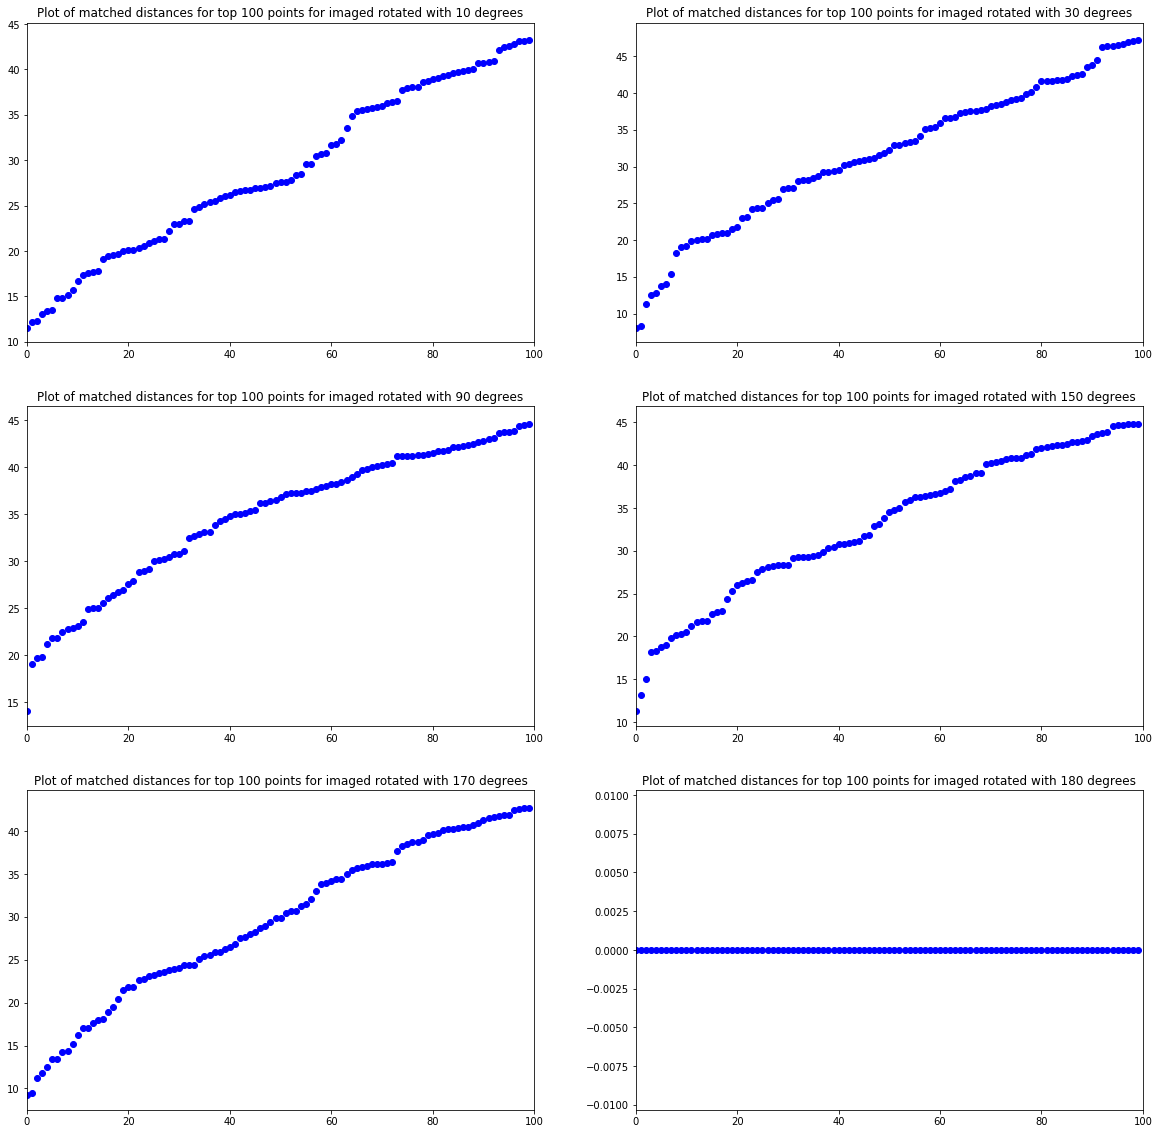

In [38]:
plt.figure(figsize=(20,20))
for j in range(len(rotation)):
    for i in range(100):
        plt.subplot(3,2,j+1), plt.scatter(i, matches2[j][i].distance, c='b')
        plt.title('Plot of matched distances for top 100 points for imaged rotated with {} degrees'.format(rotation[j]))
        plt.xlim([0,100])
plt.show()

Rotating the image does not create significant changes in the distance of the matches as compared to what scaling the image does. Increasing the angle of rotation, in most cases does not change the distance signifcantly. However, in the case of having an angle of rotation of 180 degrees, in this case all the disances between the matches is zero, which makes sense because the image is only being flipped vertically